# Convolutional Neural Networks (CNNs)

Visualized example of a 2D convolution of a 5x5 input with a 3x3 kernel is shown below.

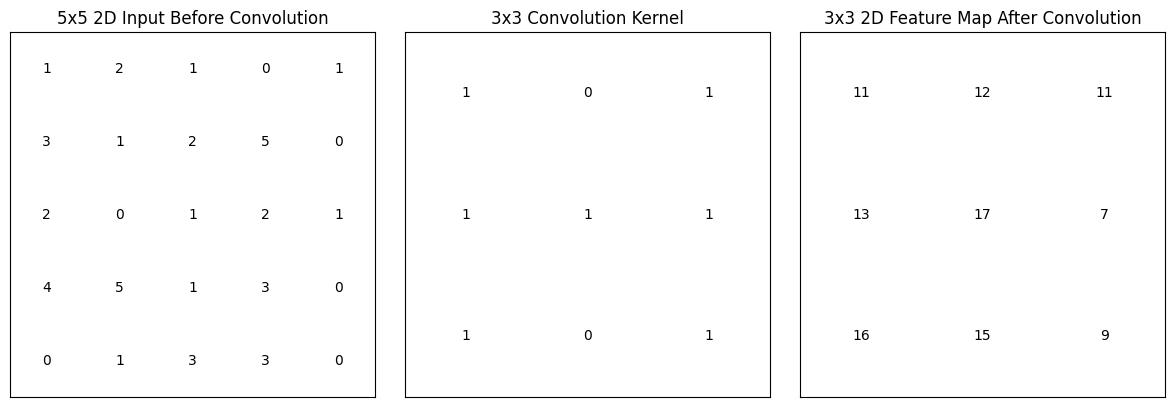

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# 2D Input before convolution
input_grid = np.array([
  [1, 2, 1, 0, 1],
  [3, 1, 2, 5, 0],
  [2, 0, 1, 2, 1],
  [4, 5, 1, 3, 0],
  [0, 1, 3, 3, 0]
])

# 3x3 kernel
kernel = np.array([
  [1, 0, 1],
  [1, 1, 1],
  [1, 0, 1]
])

input_background = np.zeros((5,5))
output_background = np.zeros((3,3))

def visualize_convolution(input, kernel, stride=1):
  input_len = input.shape[0]
  kernel_len = kernel.shape[0]
  output_len = np.ceil((input.shape[0] - kernel_len + 1)/stride).astype(int)
  input_background = np.zeros_like(input)
  kernel_background = np.zeros_like(kernel)
  output_background = np.zeros((output_len, output_len))
  # Convolve 2D input with 3x3 kernel
  output_grid = np.zeros_like(output_background)
  for i in range(0, input_len - kernel_len + 1, stride):
    for j in range(0, input_len - kernel_len + 1, stride):
      output_grid[i // stride, j // stride] = np.sum(input[i:i + kernel_len, j:j + kernel_len] * kernel)

  # Plot the 2D input
  plt.figure(figsize=(12, 4))
  plt.subplot(1, 3, 1)
  plt.imshow(input_background, cmap='Greys')
  plt.title(f'{input_len}x{input_len} 2D Input Before Convolution')
  plt.xticks([])
  plt.yticks([])
  for i in range(input_len):
    for j in range(input_len):
      plt.text(j, i, str(input_grid[i, j]), ha='center', va='center', color='black')

  # Plot the convolution kernel
  plt.subplot(1, 3, 2)
  plt.imshow(kernel_background, cmap='Greys')
  plt.title(f'{kernel_len}x{kernel_len} Convolution Kernel')
  plt.xticks([])
  plt.yticks([])
  for i in range(kernel_len):
    for j in range(kernel_len):
      plt.text(j, i, str(kernel[i, j]), ha='center', va='center', color='black')

  # Plot the final feature map
  plt.subplot(1, 3, 3)
  plt.imshow(output_background, cmap='Greys')
  plt.title(f'{output_len}x{output_len} 2D Feature Map After Convolution')
  plt.xticks([])
  plt.yticks([])
  for i in range(output_len):
    for j in range(output_len):
      plt.text(j, i, str(int(output_grid[i, j])), ha='center', va='center', color='black')

  plt.tight_layout()
  plt.show()

visualize_convolution(input_grid, kernel, stride=1)

The stride parameter controls the distance by which the filter moves after each convolution operation.

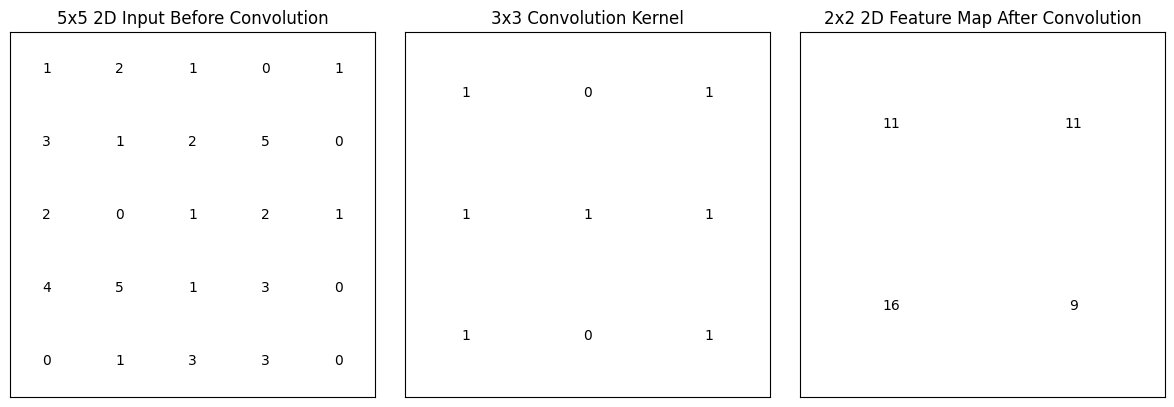

In [2]:
visualize_convolution(input_grid, kernel, stride=2)

Now, we can examine two different types of pooling techniques: Maxpool and Avgpool.

In [3]:
def visualize_pooling(input, pooling_size, operation='max_pool', stride=1):
  input_len = input.shape[0]
  output_len = (input_len - pooling_size) // stride + 1
  input_background = np.zeros_like(input)
  output_background = np.zeros((output_len, output_len))

  # Pooling on 2D input
  output_grid = np.zeros((output_len, output_len))
  if operation == 'max_pool':
    for i in range(0, input_len - pooling_size + 1, stride):
      for j in range(0, input_len - pooling_size + 1, stride):
        output_grid[i // stride, j // stride] = np.max(input[i:i + pooling_size, j:j + pooling_size])
  elif operation == 'avg_pool':
    for i in range(0, input_len - pooling_size + 1, stride):
      for j in range(0, input_len - pooling_size + 1, stride):
        output_grid[i // stride, j // stride] = np.mean(input[i:i + pooling_size, j:j + pooling_size])

  # Plot the 2D input
  plt.figure(figsize=(8, 4))
  plt.subplot(1, 2, 1)
  plt.imshow(input_background, cmap='Greys')
  plt.title(f'{input_len}x{input_len} 2D Input Before {operation}')
  plt.xticks([])
  plt.yticks([])
  for i in range(input_len):
    for j in range(input_len):
      plt.text(j, i, str(input[i, j]), ha='center', va='center', color='black')

  # Plot the pooling output
  plt.subplot(1, 2, 2)
  plt.imshow(output_background, cmap='Greys')
  plt.title(f'{output_len}x{output_len} 2D Feature Map After {operation}')
  plt.xticks([])
  plt.yticks([])
  for i in range(output_len):
    for j in range(output_len):
      if operation == 'max_pool':
        val = int(output_grid[i, j])
      else:
        val = round(output_grid[i, j], 2)
      plt.text(j, i, str(val), ha='center', va='center', color='black')

  plt.tight_layout()
  plt.show()

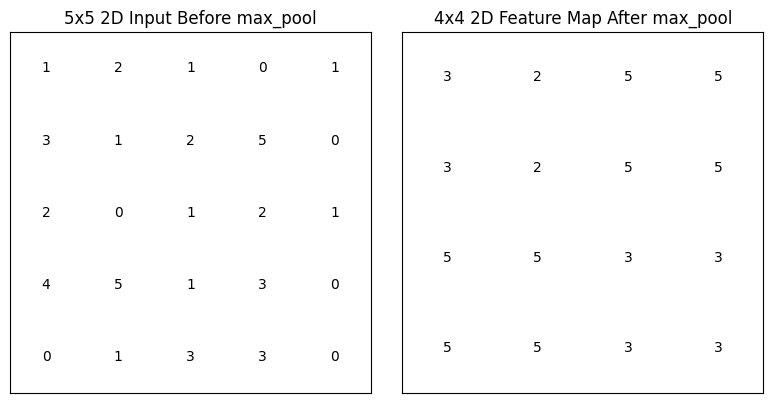

In [4]:
visualize_pooling(input_grid, 2, operation='max_pool', stride=1)

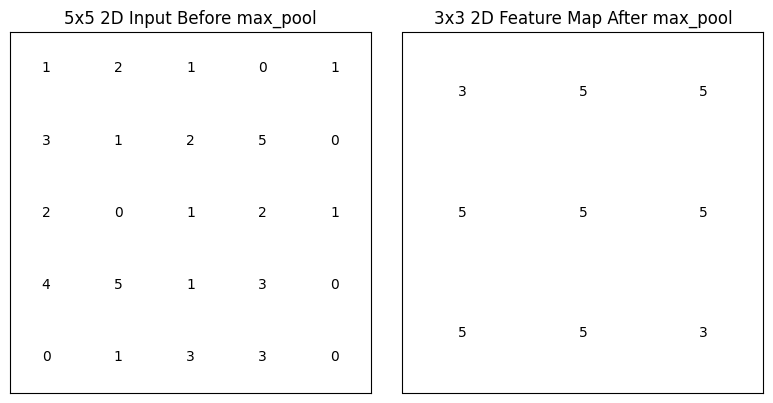

In [5]:
visualize_pooling(input_grid, 3, operation='max_pool', stride=1)

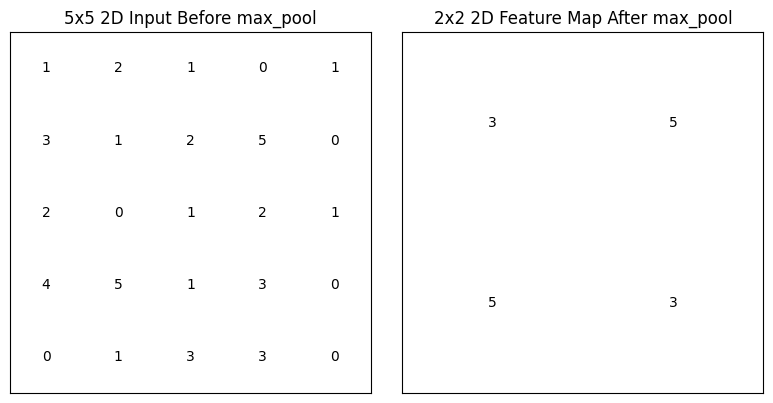

In [6]:
visualize_pooling(input_grid, 2, operation='max_pool', stride=2)

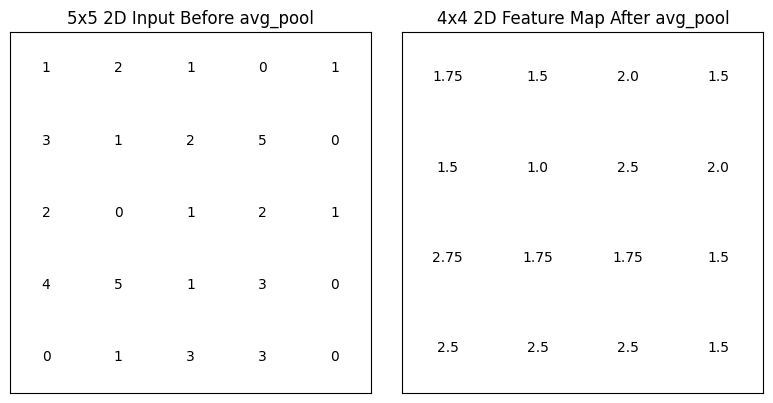

In [7]:
visualize_pooling(input_grid, 2, operation='avg_pool', stride=1)

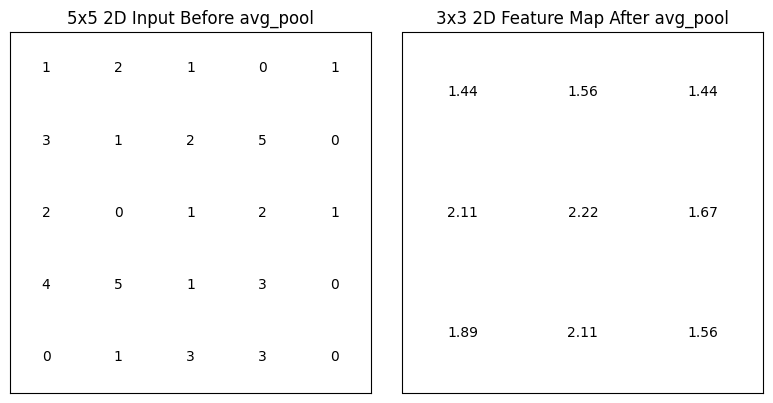

In [8]:
visualize_pooling(input_grid, 3, operation='avg_pool', stride=1)

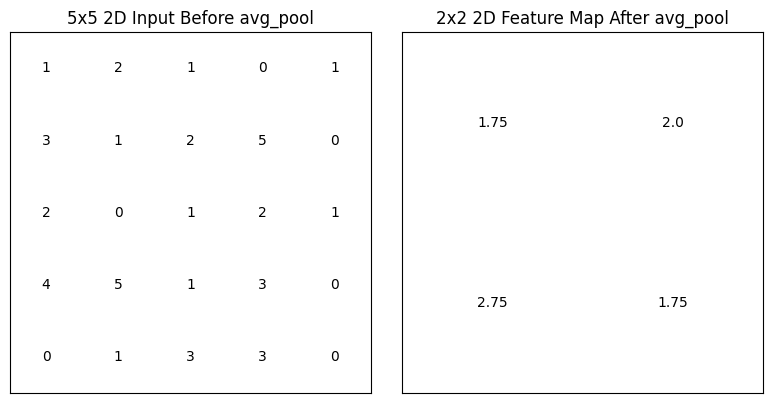

In [9]:
visualize_pooling(input_grid, 2, operation='avg_pool', stride=2)

## Creating our first CNN model in PyTorch

In PyTorch, we do not have to implement the convolution function ourselves. PyTorch provides the torch.nn module, which includes CNN.

In [10]:
#Import pytorch packages
import torch
import torch.nn as nn
import torch.nn.functional as F

Here, we define a simple CNN model which uses two convolutional layers followed by two fully connected layers. You can confirm the dimensions of the outputs as the 28x28 input propagates through the network.

In [11]:
class SIMPLE_CNN(nn.Module):
  def __init__(self):
    super(SIMPLE_CNN, self).__init__()
    # Define the first convolutional layer
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3, stride=1)
    # Define the second convolutional layer
    self.conv2 = nn.Conv2d(in_channels=3, out_channels=5, kernel_size=3, stride=1)
    # Define the first fully connected (linear) layer
    self.fc1 = nn.Linear(5 * 24 * 24, 30)  # 24x24 is the output size after convolution. 5 comes from the number of output channels we have after the second convolution
    # Define the second fully connected (linear) layer
    self.fc2 = nn.Linear(30, 10)

  def forward(self, x):
    print(f"Input Size: {x.size()}")
    # Apply the first convolutional layer followed by ReLU activation
    out = F.relu(self.conv1(x))
    print(f"Size After 1st CONV Layer: {out.size()}")
    # Apply the second convolutional layer followed by ReLU activation
    out = F.relu(self.conv2(out))
    print(f"Size After 2nd CONV Layer: {out.size()}")
    # Flatten the output tensor
    out = out.view(-1, 5 * 24 * 24)
    print(f"Size After Flattening: {out.size()}")
    # Apply the first fully connected layer followed by ReLU activation
    out = F.relu(self.fc1(out))
    print(f"Size After FC1: {out.size()}")
    # Apply the second fully connected layer followed by ReLU activation
    out = F.relu(self.fc2(out))
    print(f"Size After FC2: {out.size()}")
    return out

In [12]:
#Create an instance of the CNN class
simple_cnn = SIMPLE_CNN()
#Create a tensor (batch_size=1, channels=1, height=28, width=28)
input = torch.randn(1, 1, 28, 28)
#Feed the input to the CNN model
output = simple_cnn(input)

Input Size: torch.Size([1, 1, 28, 28])
Size After 1st CONV Layer: torch.Size([1, 3, 26, 26])
Size After 2nd CONV Layer: torch.Size([1, 5, 24, 24])
Size After Flattening: torch.Size([1, 2880])
Size After FC1: torch.Size([1, 30])
Size After FC2: torch.Size([1, 10])


Now, we can examine two different types of pooling techniques: Maxpool and Avgpool

In [13]:
input = torch.randn(1, 1, 28, 28)

# Max Pooling layer
# 2x2 Max Pooling with stride 1
maxpool = nn.MaxPool2d(kernel_size=2, stride=1)
maxpool_output = maxpool(input)
print(f"Max Pooled Output Size: {maxpool_output.size()}")

# Average Pooling layer
# 2x2 Average Pooling with stride 1
avgpool = nn.AvgPool2d(kernel_size=2, stride=1)
avgpool_output = avgpool(input)
print(f"Average Pooled Output Size: {avgpool_output.size()}")

Max Pooled Output Size: torch.Size([1, 1, 27, 27])
Average Pooled Output Size: torch.Size([1, 1, 27, 27])


The stride parameter controls the distance by which the filter moves after each convolution operation.

In [14]:
# Max Pooling layer
# 2x2 Max Pooling with stride 2
maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
maxpool_output = maxpool(input)
print(f"Max Pooled Output Size: {maxpool_output.size()}")

# Average Pooling layer
# 2x2 Average Pooling with stride 2
avgpool = nn.AvgPool2d(kernel_size=2, stride=2)
avgpool_output = avgpool(input)
print(f"Average Pooled Output Size: {avgpool_output.size()}")

Max Pooled Output Size: torch.Size([1, 1, 14, 14])
Average Pooled Output Size: torch.Size([1, 1, 14, 14])


Now, we can define a CNN model which uses two convolutional layers with kernel size of 5 with stride of 2, each followed by a 2x2 maxpool layer of stride 2. After the two convolutional layers,we have two fully connected layers. Here, we assume the input size is 64x64.

In [15]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    # Define the first convolutional layer
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=5, stride=2)
    # Define the first maxpool layer
    self.max_pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
    # Define the second convolutional layer
    self.conv2 = nn.Conv2d(in_channels=3, out_channels=5, kernel_size=5, stride=2)
    # Define the second maxpool layer
    self.max_pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
    # Define the first fully connected (linear) layer
    self.fc1 = nn.Linear(5 * 3 * 3, 30)  # Now, 3x3 is the output size after convolution
    # Define the second fully connected (linear) layer
    self.fc2 = nn.Linear(30, 10)

  def forward(self, x):
    print(f"Input Size: {x.size()}")
    # Apply the first convolutional layer
    out = F.relu(self.conv1(x))
    print(f"Size After 1st CONV Layer: {out.size()}")
    # Apply the first convolutional layer
    out = self.max_pool1(out)
    print(f"Size After 1st MAXPOOL Layer: {out.size()}")
    # Apply the second convolutional layer
    out = F.relu(self.conv2(out))
    print(f"Size After 2nd CONV Layer: {out.size()}")
    # Apply the second maxpool layer
    out = self.max_pool2(out)
    print(f"Size After 2nd MAXPOOL Layer: {out.size()}")
    # Flatten the output tensor
    out = out.view(-1, 5 * 3 * 3)
    print(f"Size After Flattening: {out.size()}")
    # Apply the first fully connected layer followed by ReLU activation
    out = F.relu(self.fc1(out))
    print(f"Size After FC1: {out.size()}")
    # Apply the second fully connected layer followed by ReLU activation
    out = F.relu(self.fc2(out))
    print(f"Size After FC2: {out.size()}")
    return out

In [16]:
#Create an instance of the CNN class
cnn = CNN()
#Create a tensor (batch_size=1, channels=1, height=64, width=64)
input = torch.randn(1, 1, 64, 64)
#Feed the input to the CNN model
output = cnn(input)

Input Size: torch.Size([1, 1, 64, 64])
Size After 1st CONV Layer: torch.Size([1, 3, 30, 30])
Size After 1st MAXPOOL Layer: torch.Size([1, 3, 15, 15])
Size After 2nd CONV Layer: torch.Size([1, 5, 6, 6])
Size After 2nd MAXPOOL Layer: torch.Size([1, 5, 3, 3])
Size After Flattening: torch.Size([1, 45])
Size After FC1: torch.Size([1, 30])
Size After FC2: torch.Size([1, 10])


## MNIST Handwritten Digit Classification with CNN

Now we can apply CNN to the MNIST dataset. The goal of out model is to accurately classify handwritten digits from the MNIST dataset. MNIST data consists of 28x28 pixel grayscale images of handwritten digits from 0 to 9.

In [17]:
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.init
import torch.optim as optim

Here are some example images from the MNIST dataset.

100%|██████████| 9912422/9912422 [00:00<00:00, 150315852.20it/s]


Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 3671668.70it/s]


Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 45580250.42it/s]


Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 21477484.52it/s]


Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



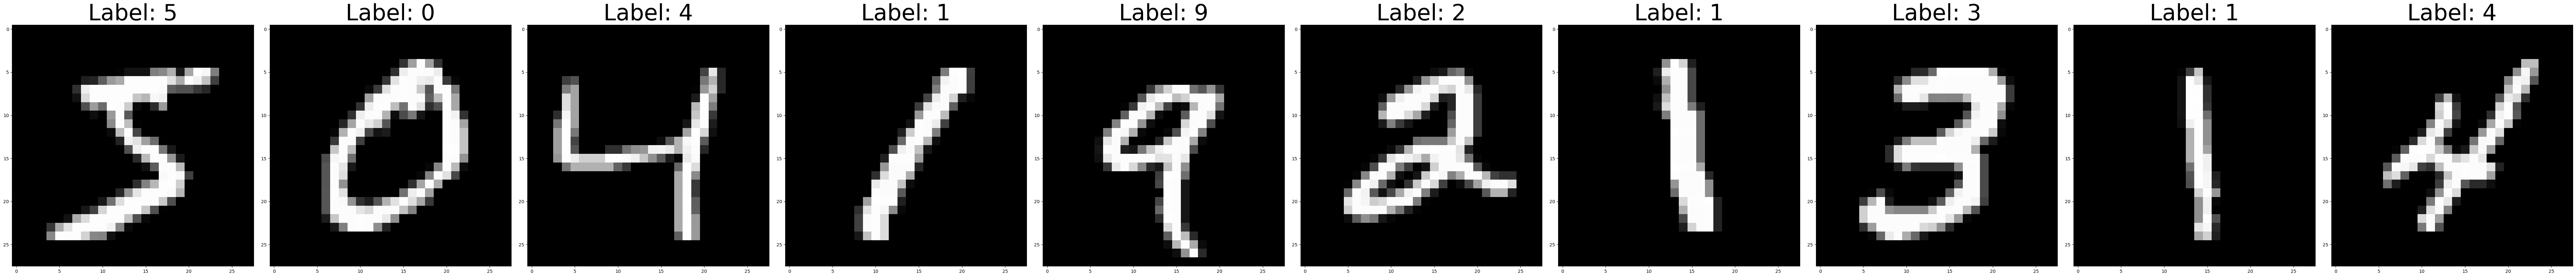

In [18]:
BATCH_SIZE = 100

mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

train_loader = torch.utils.data.DataLoader(
    dataset=mnist_train, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)

test_loader = torch.utils.data.DataLoader(
    dataset=mnist_test, batch_size=BATCH_SIZE, shuffle=False, drop_last=True)

plt.figure(figsize=(80,8))
for i in range(10):
    image, label = mnist_train[i]
    plt.subplot(1, 10, i+1)
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(f'Label: {label}', fontsize=50)

plt.tight_layout()
plt.show()

Here we define a CNN model for the classification of MNIST digits.

In [19]:
class MNIST_CNN(nn.Module):
  def __init__(self):
    super(MNIST_CNN, self).__init__()
    # Define the first convolutional layer
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1)
    # Define the first maxpool layer
    self.max_pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
    # Define the second convolutional layer
    self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1)
    # Define the second maxpool layer
    self.max_pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
    # Define the first fully connected (linear) layer
    self.fc1 = nn.Linear(32 * 4 * 4, 64)
    # Define the second fully connected (linear) layer
    self.fc2 = nn.Linear(64, 10)

  def forward(self, x):
    # Apply the first convolutional layer
    out = F.relu(self.conv1(x))
    # Apply the first convolutional layer
    out = self.max_pool1(out)
    # Apply the second convolutional layer
    out = F.relu(self.conv2(out))
    # Apply the second maxpool layer
    out = self.max_pool2(out)
    # Flatten the output tensor
    out = out.view(-1, 32 * 4 * 4)
    # Apply the first fully connected layer followed by ReLU activation
    out = F.relu(self.fc1(out))
    # Apply the second fully connected layer followed by ReLU activation
    out = F.relu(self.fc2(out))
    return out

In [20]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
if device =='cuda':
    print("Run on GPU...")
else:
    print("Run on CPU...")

model = MNIST_CNN().to(device)
data = torch.randn(1,1,28,28)
data = data.to(device)
out = model(data)
print(out.detach().cpu().numpy().shape)

Run on GPU...
(1, 10)


In [21]:
LR = 0.01
MOMENTUM = 0.9
REG = 1e-4
EPOCHS = 10

In [22]:
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=LR, momentum=MOMENTUM, weight_decay=REG)

print("==> Training starts!")
print("="*50)
for i in range(0, EPOCHS):
  model.train()
  print("Epoch %d:" %i)
  total_examples = 0
  correct_examples = 0
  for batch_idx, (inputs, targets) in enumerate(train_loader):
    inputs = inputs.to(device)
    targets = targets.to(device)
    out = model(inputs)
    loss = criterion(out, targets)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    _, predicted = torch.max(out, 1)
    total_examples += targets.size(0)
    correct_examples += (predicted == targets).sum().item()
    avg_acc = correct_examples / total_examples
  print("Training accuracy: %.4f" %(avg_acc))

==> Training starts!
Epoch 0:
Training accuracy: 0.7277
Epoch 1:
Training accuracy: 0.9693
Epoch 2:
Training accuracy: 0.9790
Epoch 3:
Training accuracy: 0.9829
Epoch 4:
Training accuracy: 0.9861
Epoch 5:
Training accuracy: 0.9875
Epoch 6:
Training accuracy: 0.9895
Epoch 7:
Training accuracy: 0.9907
Epoch 8:
Training accuracy: 0.9917
Epoch 9:
Training accuracy: 0.9923


We see that we can easily achieve 97% training accuracy even after the first epoch. After all 10 epochs, we reach 99% accuracy on the training set. Now, we test our model on unseen testing set to evaluate our model performance.

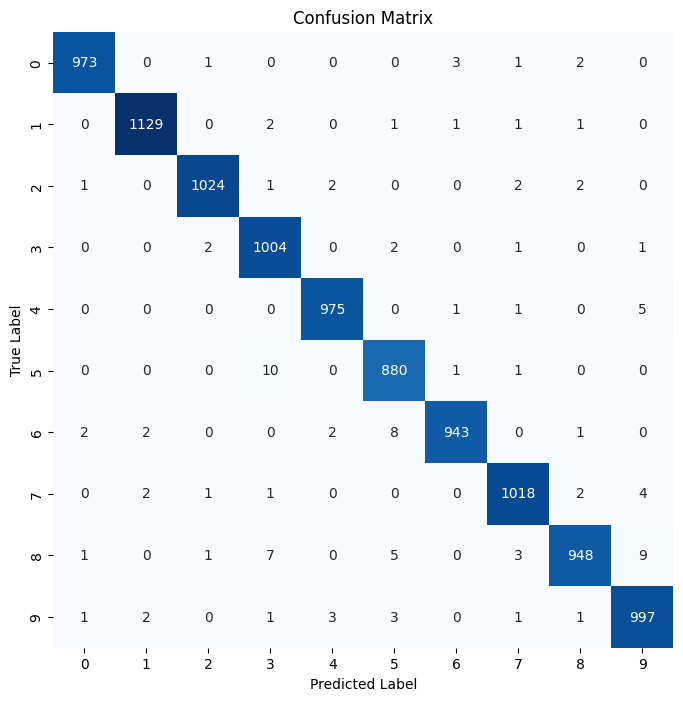

In [39]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

true_labels = []
predicted_labels = []
total_examples = 0
correct_examples = 0

model.eval()
with torch.no_grad():
    for batch_idx, (inputs, targets) in enumerate(test_loader):
      inputs = inputs.to(device)
      targets = targets.to(device)
      out = model(inputs)
      _, predicted = torch.max(out, 1)
      total_examples += targets.size(0)
      correct_examples += (predicted == targets).sum().item()
      true_labels.append(targets.cpu().numpy())
      predicted_labels.append(predicted.cpu().numpy())
    avg_acc = correct_examples / total_examples

true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)
conf_matrix = confusion_matrix(true_labels.flatten(), predicted_labels.flatten())

plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

We see that our CNN model successfully classifies 98.9% of the MNIST images.

## CIFAR100 Image Classification wtih Simple CNN

Now, we aim to apply our CNN knowledge on a much bigger dataset, namely the CIFAR100 dataset which contains 60,000 RGB (3 channel) images of size 32x32. There are 100 classes, thus the name CIFAR100. We can use the same workflow as above by first showing some examples from the CIFAR100 dataset.

Files already downloaded and verified
Files already downloaded and verified


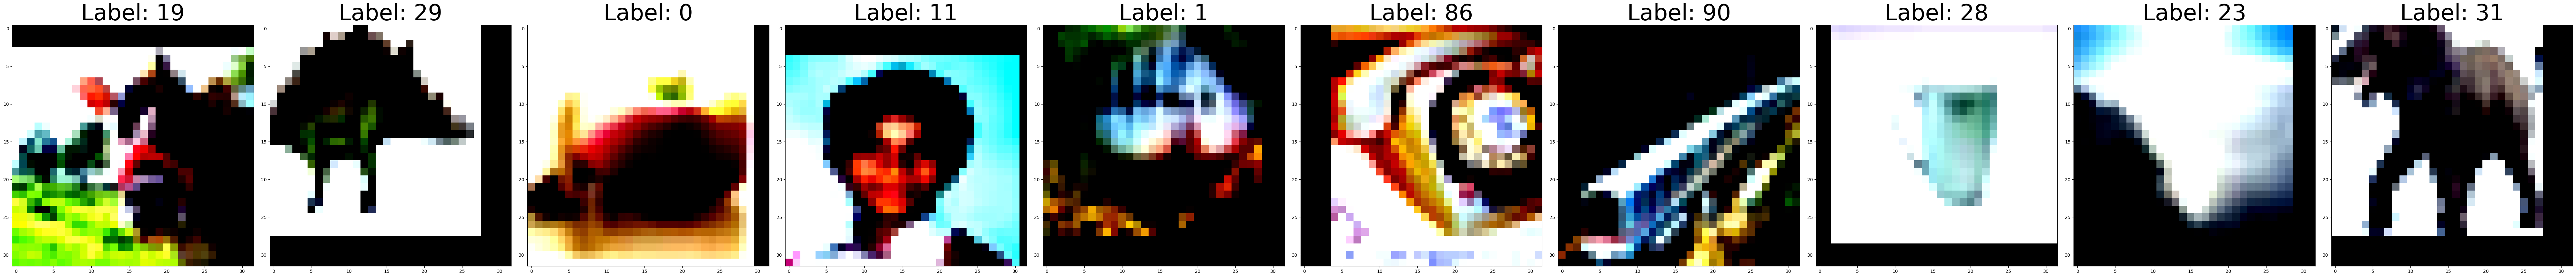

In [69]:
CIFAR100_train = dsets.CIFAR100(root='CIFAR100_data/',
                          train=True,
                          transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.RandomHorizontalFlip(p=0.5),
                              transforms.RandomCrop(size=(32, 32), padding=4),
                              transforms.Normalize(mean=[0.5071, 0.4867, 0.4408], std=[0.2675, 0.2565, 0.2761]),
                          ]),
                          download=True)

CIFAR100_test = dsets.CIFAR100(root='CIFAR100_data/',
                         train=False,
                         transform=transforms.Compose([
                             transforms.ToTensor(),
                             transforms.Normalize(mean=[0.5071, 0.4867, 0.4408], std=[0.2675, 0.2565, 0.2761]),
                         ]),
                         download=True)

plt.figure(figsize=(80,8))
for i in range(10):
    image, label = CIFAR100_train[i]
    plt.subplot(1, 10, i+1)
    plt.imshow(image.permute(1,2,0))
    plt.title(f'Label: {label}', fontsize=50)

plt.tight_layout()
plt.show()

Here, we define our model to classify CIFAR100 with a simple CNN model. We have three convolution layers followed by two fully connected with layer.

In [48]:
class CIFAR100_CNN(nn.Module):
  def __init__(self):
    super(CIFAR100_CNN, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
    self.bn1 = nn.BatchNorm2d(32)
    self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
    self.bn2 = nn.BatchNorm2d(64)
    self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
    self.bn3 = nn.BatchNorm2d(128)
    self.max_pool = nn.MaxPool2d(kernel_size=2, stride=2)
    self.fc1 = nn.Linear(128 * 4 * 4, 512)
    self.dropout = nn.Dropout(0.5)
    self.fc2 = nn.Linear(512, 100)

  def forward(self, x):
    out = F.relu(self.bn1(self.conv1(x)))
    out = self.max_pool(out)
    out = F.relu(self.bn2(self.conv2(out)))
    out = self.max_pool(out)
    out = F.relu(self.bn3(self.conv3(out)))
    out = self.max_pool(out)
    out = out.view(-1, 128 * 4 * 4)
    out = F.relu(self.fc1(out))
    out = self.dropout(out)
    out = self.fc2(out)
    return out

In [49]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
if device =='cuda':
    print("Run on GPU...")
else:
    print("Run on CPU...")

model = CIFAR100_CNN().to(device)
data = torch.randn(1,3,32,32)
data = data.to(device)
out = model(data)
print(out.detach().cpu().numpy().shape)

Run on GPU...
(1, 100)


In [59]:
LR = 0.001
REG = 1e-4
EPOCHS = 20
BATCH_SIZE = 100

train_loader = torch.utils.data.DataLoader(
    dataset=CIFAR100_train, batch_size=BATCH_SIZE, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    dataset=CIFAR100_test, batch_size=BATCH_SIZE, shuffle=False)

In [ ]:
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(model.parameters(), lr=LR, weight_decay=REG)

print("==> Training starts!")
print("="*50)
for i in range(0, EPOCHS):
  model.train()
  print("Epoch %d:" %i)
  total_examples = 0
  correct_examples = 0
  for batch_idx, (inputs, targets) in enumerate(data_loader):
    inputs = inputs.to(device)
    targets = targets.to(device)
    out = model(inputs)
    loss = criterion(out, targets)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    _, predicted = torch.max(out, 1)
    total_examples += targets.size(0)
    correct_examples += (predicted == targets).sum().item()
    avg_acc = correct_examples / total_examples
  print("Training accuracy: %.4f" %(avg_acc))

==> Training starts!
Epoch 0:
Training accuracy: 0.1214
Epoch 1:
Training accuracy: 0.2254
Epoch 2:
Training accuracy: 0.2778
Epoch 3:
Training accuracy: 0.3097
Epoch 4:
Training accuracy: 0.3384
Epoch 5:
Training accuracy: 0.3636
Epoch 6:
Training accuracy: 0.3820
Epoch 7:
Training accuracy: 0.4011
Epoch 8:
Training accuracy: 0.4167
Epoch 9:
Training accuracy: 0.4366
Epoch 10:
Training accuracy: 0.4489
Epoch 11:
Training accuracy: 0.4650
Epoch 12:
Training accuracy: 0.4791
Epoch 13:
Training accuracy: 0.4920
Epoch 14:
Training accuracy: 0.5031
Epoch 15:
Training accuracy: 0.5166
Epoch 16:
Training accuracy: 0.5300
Epoch 17:
Training accuracy: 0.5397
Epoch 18:
Training accuracy: 0.5508
Epoch 19:
Training accuracy: 0.5606


We can continue training our simple CNN model for more epochs to reach a higher accuracy, but continuing the training will show that we cannot achieve a significantly higher accuracy on the CIFAR100 dataset. This means that we need a deeper and complex model. At the bottom, we have a Residual Network (ResNet) which solves the vanishing gradient problem of deep neural networks with skip connections. ResNet was proposed by Kaiming He et al, and the original paper can be found here: "Deep Residual Learning for Image Recognition" https://arxiv.org/abs/1512.03385

In [70]:
class ResidualBlock(nn.Module):
  def __init__(self, in_channels, out_channels, stride):
    super(ResidualBlock, self).__init__()
    self.conv1 = nn.Conv2d(in_channels, out_channels, 3, stride=stride, padding=1)
    self.bn1 = nn.BatchNorm2d(out_channels)
    self.conv2 = nn.Conv2d(out_channels, out_channels, 3, stride=1, padding=1)
    self.bn2 = nn.BatchNorm2d(out_channels)
    self.downsample = None
    if stride==2:
      self.downsample = nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride)

  def forward(self, x):
    res = x
    # print(f"RES Shape: {res.shape}")
    out = self.conv1(x)
    # print(f"CONV1 Shape: {out.shape}")
    out = self.bn1(out)
    out = F.relu(out)
    out = self.conv2(out)
    # print(f"CONV2 Shape: {out.shape}")
    out = self.bn2(out)
    if self.downsample is not None:
      res = self.downsample(x)
      # print(f"NEW RES Shape: {res.shape}")

    out += res
    out = F.relu(out)
    return out

class ResNet(nn.Module):
  def __init__(self, resblock, n=3):
    super(ResNet, self).__init__()
    self.n = n
    self.conv1 = nn.Conv2d(3, 16, 3, stride=1, padding=1)
    self.bn1 = nn.BatchNorm2d(16)
    self.avgpool = nn.AvgPool2d(4)
    self.fc1   = nn.Linear(128, 100)
    self.layer1 = self.create_layer(resblock, 16, 16, stride=1)
    self.layer2 = self.create_layer(resblock, 16, 32, stride=2)
    self.layer3 = self.create_layer(resblock, 32, 64, stride=2)
    self.layer4 = self.create_layer(resblock, 64, 128, stride=2)

  def create_layer(self, resblock, in_channels, out_channels, stride):
    layers = nn.ModuleList()
    layers.append(resblock(in_channels, out_channels, stride))
    for i in range(self.n-1):
      layers.append(resblock(out_channels, out_channels, stride=1))
    return nn.Sequential(*layers)

  def forward(self, x):
    out = self.conv1(x)
    out = self.bn1(out)
    out = F.relu(out)
    out = self.layer1(out)
    out = self.layer2(out)
    out = self.layer3(out)
    out = self.layer4(out)
    out = self.avgpool(out)
    out = out.view(out.size(0), -1)
    out = self.fc1(out)
    return out

In [71]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
if device =='cuda':
    print("Run on GPU...")
else:
    print("Run on CPU...")

model = ResNet(ResidualBlock).to(device)
data = torch.randn(1,3,32,32)
data = data.to(device)
out = model(data)
print(out.detach().cpu().numpy().shape)

Run on GPU...
(1, 100)


## CIFAR100 Classification with Residual Neural Networks (ResNet)

We will use a technique called learning rate decay, which is a method to reduce our learning rate of our optimizer during training. If we use a high learning rate, there is a chance that we overshoot and miss the optimal solution. If we use a small learning rate, the learning process may take too long or be stuck at a local minimum. Learning rate decay starts off with a high learning rate to make big progress towards the optimal solution. Later, we decay the learning rate to avoid overshooting. Here, we start with LR=0.001 and after 30/50 epochs we will reduce LR to 0.0001.

In [72]:
import os, sys

LR = 0.001
DECAY = 0.1
REG = 1e-4
EPOCHS = 40
DECAY_EPOCHS = 25
BATCH_SIZE = 100
CHECKPOINT_FOLDER = "./saved_model"

criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(model.parameters(), lr=LR, weight_decay=REG)

train_acc = []
best_acc = 0

print("==> Training starts!")
print("="*50)
for i in range(0, EPOCHS):
  model.train()
  print("Epoch %d:" %i)
  total_examples = 0
  correct_examples = 0
  if i % DECAY_EPOCHS == 0 and i != 0:
    LR = LR * DECAY
    for param_group in optimizer.param_groups:
        param_group['lr'] = LR
  for batch_idx, (inputs, targets) in enumerate(train_loader):
    inputs = inputs.to(device)
    targets = targets.to(device)
    out = model(inputs)
    loss = criterion(out, targets)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    _, predicted = torch.max(out, 1)
    total_examples += targets.size(0)
    correct_examples += (predicted == targets).sum().item()
    avg_acc = correct_examples / total_examples

  # save the model checkpoint
  if avg_acc > best_acc:
      best_acc = avg_acc
      if not os.path.exists(CHECKPOINT_FOLDER):
          os.makedirs(CHECKPOINT_FOLDER)
      print("Saving ...")
      state = {'state_dict': model.state_dict(), 'epoch': i, 'lr': LR}
      torch.save(state, os.path.join(CHECKPOINT_FOLDER, 'resnet.pth'))

  print("Training accuracy: %.4f" %(avg_acc))
  train_acc.append(avg_acc)

==> Training starts!
Epoch 0:
Saving ...
Training accuracy: 0.1146
Epoch 1:
Saving ...
Training accuracy: 0.2391
Epoch 2:
Saving ...
Training accuracy: 0.3346
Epoch 3:
Saving ...
Training accuracy: 0.4084
Epoch 4:
Saving ...
Training accuracy: 0.4703
Epoch 5:
Saving ...
Training accuracy: 0.5174
Epoch 6:
Saving ...
Training accuracy: 0.5637
Epoch 7:
Saving ...
Training accuracy: 0.6052
Epoch 8:
Saving ...
Training accuracy: 0.6505
Epoch 9:
Saving ...
Training accuracy: 0.6909
Epoch 10:
Saving ...
Training accuracy: 0.7274
Epoch 11:
Saving ...
Training accuracy: 0.7644
Epoch 12:
Saving ...
Training accuracy: 0.8040
Epoch 13:
Saving ...
Training accuracy: 0.8258
Epoch 14:
Saving ...
Training accuracy: 0.8511
Epoch 15:
Saving ...
Training accuracy: 0.8621
Epoch 16:
Saving ...
Training accuracy: 0.8828
Epoch 17:
Saving ...
Training accuracy: 0.8935
Epoch 18:
Saving ...
Training accuracy: 0.9011
Epoch 19:
Saving ...
Training accuracy: 0.9125
Epoch 20:
Training accuracy: 0.9083
Epoch 21:
Sav

As shown below, we see that ResNet is much more effective in classifying the CIFAR100 dataset compared to the simple CNN model that we have. We also see that we see a slight 'jump' in accuracy when we decay the weight to 0.0001.

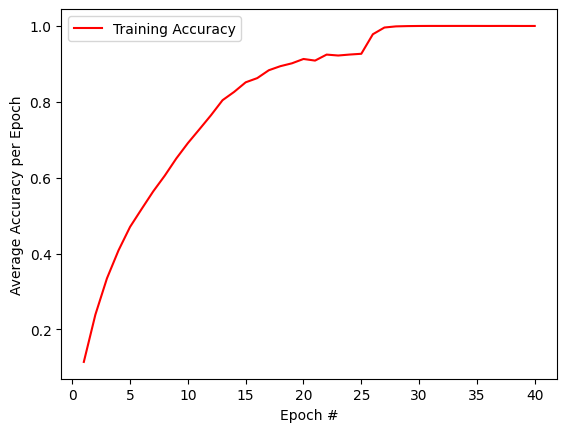

In [73]:
plt.figure()
plt.plot(np.arange(1,EPOCHS+1), np.array(train_acc), color='red')
plt.legend(['Training Accuracy'])
plt.xlabel('Epoch #')
plt.ylabel('Average Accuracy per Epoch')
plt.show()

In [74]:
model = ResNet(ResidualBlock)
state_dict = torch.load('./saved_model/resnet.pth')
model.load_state_dict(state_dict['state_dict'])
model.cuda()

ResNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (avgpool): AvgPool2d(kernel_size=4, stride=4, padding=0)
  (fc1): Linear(in_features=128, out_features=100, bias=True)
  (layer1): Sequential(
    (0): ResidualBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): ResidualBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn2): BatchNorm2d(

In [81]:
true_labels = []
predicted_labels = []
total_examples = 0
correct_examples = 0

model.eval()
with torch.no_grad():
    for batch_idx, (inputs, targets) in enumerate(test_loader):
        inputs = inputs.to(device)
        targets = targets.to(device)
        out = model(inputs)

        # Get top 5 predicted classes and their probabilities
        _, predicted = torch.topk(out, 10, dim=1)

        # Convert targets and predicted to numpy arrays
        targets_np = targets.cpu().numpy()
        predicted_np = predicted.cpu().numpy()

        total_examples += targets.size(0)

        # Check if the true label is among the top 5 predicted labels
        for i in range(targets_np.shape[0]):
            if targets_np[i] in predicted_np[i]:
                correct_examples += 1

top_5_acc = correct_examples / total_examples
print("Top-5 Accuracy:", top_5_acc)


Top-5 Accuracy: 0.8678


We have seen that ResNet was able to classify the CIFAR100 dataset with very high accuracy. For further exploration, we may try different hyperparameters to train our ResNet model and it's affect on the final accuracy.

In [ ]:
model = ResNet(ResidualBlock).to(device)
import os, sys

LR = 0.001
DECAY = 0.1
REG = 1e-4
EPOCHS = 40
DECAY_EPOCHS = 25
BATCH_SIZE = 100
CHECKPOINT_FOLDER = "./saved_model"

data_loader = torch.utils.data.DataLoader(
    dataset=CIFAR100_train, batch_size=BATCH_SIZE, shuffle=True)

criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(model.parameters(), lr=LR, weight_decay=REG)

train_acc = []
best_acc = 0

print("==> Training starts!")
print("="*50)
for i in range(0, EPOCHS):
  model.train()
  print("Epoch %d:" %i)
  total_examples = 0
  correct_examples = 0
  if i % DECAY_EPOCHS == 0 and i != 0:
    LR = LR * DECAY
    for param_group in optimizer.param_groups:
        param_group['lr'] = LR
  for batch_idx, (inputs, targets) in enumerate(data_loader):
    inputs = inputs.to(device)
    targets = targets.to(device)
    out = model(inputs)
    loss = criterion(out, targets)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    _, predicted = torch.max(out, 1)
    total_examples += targets.size(0)
    correct_examples += (predicted == targets).sum().item()
    avg_acc = correct_examples / total_examples

  # save the model checkpoint
  if avg_acc > best_acc:
      best_acc = avg_acc
      if not os.path.exists(CHECKPOINT_FOLDER):
          os.makedirs(CHECKPOINT_FOLDER)
      print("Saving ...")
      state = {'state_dict': model.state_dict(), 'epoch': i, 'lr': LR}
      torch.save(state, os.path.join(CHECKPOINT_FOLDER, 'resnet.pth'))

  print("Training accuracy: %.4f" %(avg_acc))
  train_acc.append(avg_acc)

In [52]:
for param in model.parameters():
  print(param.data)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
tensor([0.8947, 0.9390, 0.8359, 0.9888, 0.8256, 0.8879, 0.9568, 0.7788, 0.6779,
        0.8619, 0.7088, 0.9594, 1.0314, 0.8737, 0.8172, 0.7920],
       device='cuda:0')
tensor([-0.0547, -0.2628, -0.0289, -0.2608,  0.0789, -0.1644, -0.2285, -0.1178,
        -0.2346, -0.0849, -0.2897, -0.1905, -0.0878, -0.0304, -0.1317, -0.1181],
       device='cuda:0')
tensor([[[[-0.0449, -0.0479,  0.1210],
          [-0.1598, -0.1686, -0.0915],
          [-0.0258, -0.0129,  0.0363]],

         [[-0.1208,  0.0611,  0.1274],
          [-0.1737, -0.0857,  0.0965],
          [ 0.1615,  0.0762, -0.0422]],

         [[-0.0670, -0.0636, -0.1283],
          [-0.0577,  0.0276,  0.0665],
          [-0.0592,  0.0211, -0.0471]],

         ...,

         [[ 0.0205,  0.1324,  0.0190],
          [ 0.0131, -0.0721,  0.0687],
          [-0.0666, -0.1769, -0.0025]],

         [[-0.0376, -0.0707,  0.0649],
          [-0.1250, -0.0550, -0.0295],
          [ 0.0656, -0.0087,  0.0512]],

